In [0]:
from fastai.tabular import *

In [2]:
! git clone https://github.com/ncd-surveillance-system/SIH_demogrphical_analysis.git

Cloning into 'SIH_demogrphical_analysis'...
remote: Enumerating objects: 141, done.
remote: Counting objects: 100% (141/141), done.
remote: Compressing objects: 100% (93/93), done.
remote: Total 141 (delta 65), reused 110 (delta 43), pack-reused 0
Receiving objects: 100% (141/141), 5.42 MiB | 23.51 MiB/s, done.
Resolving deltas: 100% (65/65), done.


In [9]:
cd SIH_demogrphical_analysis/Diabetes/

/content/SIH_demogrphical_analysis/Diabetes


In [0]:
df = pd.read_csv('diabetes_cleaned.csv')
df.drop('HbA1c', axis=1, inplace=True)

In [16]:
df.columns

Index(['Sex', 'Blood pressure_category', 'Triglyceride-category',
       'HDL_category', 'LDL_category', 'GPT_category', 'g-GTP_category',
       'HbA1c_category', 'Age', 'Living area ', 'Height', 'Weight',
       'Waist circumference (cm)', 'BMI', 'Triglyceride', 'HDL', 'LDL',
       'Systolic BP', 'Diastolic BP', 'Smoking status', 'healthgui_active',
       'healthgui_motivation', 'GOT', 'GPT', '?-GTP', 'Uric acid',
       'Urinary glucose', 'Serum creatinine', 'eGFR', 'Uric-pro', 'Hematocrit',
       'Hemoglobin', 'CI_category', 'Taking medication for hypertenstion',
       'Taking medication for hyperlipidemia',
       'Taking medication for diabetes', 'History of cardiovascular diseases',
       'History of Dialysis', 'History of cerebrovascular diseases',
       'Presence of Anemia-category', 'Exercise more than 30 minutes-category',
       'Walking or physical activity-category', 'Quick walking-category',
       'Weight changes within 1 yr-category', 'Quick eating-category',
   

In [0]:
dependant = 'HbA1c_category'
categorical = ['Sex', 'Blood pressure_category', 'Triglyceride-category',
       'HDL_category', 'LDL_category', 'GPT_category', 'g-GTP_category', 
       'Living area ',
       'Smoking status', 'healthgui_active',
       'healthgui_motivation',
       'Urinary glucose', 'Uric-pro',
       'CI_category', 'Taking medication for hypertenstion',
       'Taking medication for hyperlipidemia',
       'Taking medication for diabetes', 'History of cardiovascular diseases',
       'History of Dialysis', 'History of cerebrovascular diseases',
       'Presence of Anemia-category', 'Exercise more than 30 minutes-category',
       'Walking or physical activity-category', 'Quick walking-category',
       'Weight changes within 1 yr-category', 'Quick eating-category',
       'Eating within 2 hr before bed-category', 'Midnight snack-category',
       'Skipping breakfast-category', 'Alcohol drinking-category',
       'Enough sleep', 'Improve lifestyle habits', 'Hope for health guidance']
continuous = list(set(df.columns) - set(categorical))
continuous.remove('HbA1c_category')

procs = [FillMissing, Categorify, Normalize]

In [0]:
test = TabularList.from_df(df.iloc[800:1000].copy(), path='.', cat_names=categorical, cont_names=continuous)

In [0]:
data = (TabularList.from_df(df, path='.', cat_names=categorical, cont_names=continuous, procs=procs)
                           .split_by_idx(list(range(800,1000)))
                           .label_from_df(cols=dependant)
                           .add_test(test)
                           .databunch())

In [31]:
data.show_batch(rows=10)

Sex,Blood pressure_category,Triglyceride-category,HDL_category,LDL_category,GPT_category,g-GTP_category,Living area,Smoking status,healthgui_active,healthgui_motivation,Urinary glucose,Uric-pro,CI_category,Taking medication for hypertenstion,Taking medication for hyperlipidemia,Taking medication for diabetes,History of cardiovascular diseases,History of Dialysis,History of cerebrovascular diseases,Presence of Anemia-category,Exercise more than 30 minutes-category,Walking or physical activity-category,Quick walking-category,Weight changes within 1 yr-category,Quick eating-category,Eating within 2 hr before bed-category,Midnight snack-category,Skipping breakfast-category,Alcohol drinking-category,Enough sleep,Improve lifestyle habits,Hope for health guidance,Hematocrit,Diastolic BP,eGFR,LDL,Age,Waist circumference (cm),HDL,Hemoglobin,Uric acid,Triglyceride,Serum creatinine,Weight,Height,BMI,Systolic BP,?-GTP,GOT,GPT,target
0,1,1,2,3,1,1,3.0,0,0,0,1,1,1,0.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,1.0,1.0,2.0,-0.1891,-0.4943,-0.8549,2.0421,0.0353,-1.0453,-0.7690,-0.2738,-0.6529,0.7872,0.0547,-1.2674,-0.7040,-1.2127,-0.5181,-0.3882,-0.1649,-0.4258,0
0,2,1,1,3,1,1,11.0,0,0,0,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,-1.1191,-1.9733,-1.1805,1.0728,0.6903,0.1979,-0.3871,-0.8673,0.4529,0.1802,0.2718,-0.6093,-1.0923,0.0273,1.2951,-0.2938,0.0237,-0.1348,0
1,1,1,2,3,1,1,5.0,0,0,0,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,1.0,0.6892,-0.8640,-0.2543,1.5731,-0.0957,-0.2683,-1.0872,0.9872,1.0673,0.3352,0.7603,0.2890,-0.0530,0.4599,-0.8580,0.0838,-0.4478,-0.2803,1
1,1,1,1,1,1,2,1.0,0,0,0,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,1.0,2.0,3.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.8258,0.4301,-0.2326,0.1347,0.1663,0.4051,-0.5781,1.5065,-0.4686,-0.3106,0.7060,1.4451,2.3110,0.0850,0.1618,0.6740,-0.1649,0.0107,0
1,1,1,1,1,1,1,4.0,0,0,0,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,3.0,1.0,2.0,2.0,-0.6024,0.0604,-0.4207,-1.8664,0.9524,-0.3719,-0.0053,-0.1255,-0.5915,0.0252,0.7603,0.3245,0.2553,0.2580,-0.4048,-0.2466,-0.3535,-0.4985,0
1,1,1,1,3,1,1,2.0,0,0,0,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,-0.6024,0.2452,-0.2326,1.2291,0.5593,-1.7704,0.9494,-0.6447,-0.2843,-0.6593,0.6517,-0.8672,-0.1101,-1.0397,-0.4048,-0.3646,-0.3535,-0.5713,0
1,2,1,1,1,1,2,27.0,1,0,0,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,1.0,2.0,1.0,0.4567,0.7999,0.7007,-1.8039,-0.0957,-1.4182,0.8221,0.0229,0.9444,-0.7497,0.0547,-0.6893,0.6893,-1.2992,0.7284,0.6740,0.9665,-0.2075,0
1,2,1,1,2,2,3,5.0,0,1,0,3,1,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,3.0,2.0,2.0,1.0,0.9991,2.1864,-0.1241,0.7914,-0.4888,1.6483,-0.5781,1.0614,1.4973,2.2336,0.7060,1.2939,0.3924,1.3539,1.5217,1.6417,0.4951,2.4115,1
1,2,1,1,1,1,2,27.0,1,0,0,1,2,0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,-0.3958,1.1696,0.3969,-1.5850,0.1663,-1.3560,0.1857,-0.9414,1.1902,-0.9692,0.2175,-0.7960,0.6550,-1.3857,1.0684,1.2169,0.8722,-0.2075,0
1,1,1,1,3,1,2,12.0,1,0,0,1,1,1,0.0,1.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,1.0,3.0,1.0,0.4050,-0.1245,0.9395,1.1353,0.5593,-0.0922,-0.5144,0.9872,0.2686,-0.7109,-0.1624,0.1733,0.7121,-0.2610,-0.0648,0.4615,-0.4478,-0.2075,0


In [0]:
learn = tabular_learner(data, layers=[200,100], metrics=accuracy)

In [50]:
learn.fit(1, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.333647,0.311982,0.910000,00:01


In [39]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


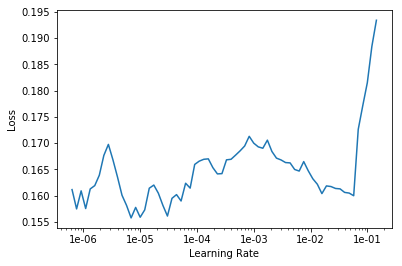

In [40]:
learn.recorder.plot()